In [1]:
# Trying to replicate such contour maps with averages, be careful of places that may have not too many oceans. 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Get the relevant paths to files
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename = 'ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc'
datadir_temp = 'ocean_monthly_z/ts/monthly/5yr/'
filename_temp = 'ocean_monthly_z.071101-071512.thetao.nc'

In [3]:
phyto = xr.open_dataset(rootdir + datadir + filename)
print(phyto)

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    phyc        (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc
    title:               ESM4_piControl_D
    associated_files:    areacello: 07110101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A


In [4]:
temp = xr.open_dataset(rootdir+ datadir_temp + filename_temp)
print(temp)

<xarray.Dataset>
Dimensions:     (nv: 2, time: 60, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * nv          (nv) float64 1.0 2.0
  * time        (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_i         (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l         (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Data variables:
    average_DT  (time) timedelta64[ns] ...
    average_T1  (time) object ...
    average_T2  (time) object ...
    thetao      (time, z_l, yh, xh) float32 ...
    time_bnds   (time, nv) object ...
Attributes:
    filename:            ocean_monthly_z.071101-071512.thetao.nc
    title:               ESM4_piControl_D
    associated_files:    areacello: 07110101.ocean_static.nc
    grid_type:           regular
    grid_tile:           N/A
    external_var

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


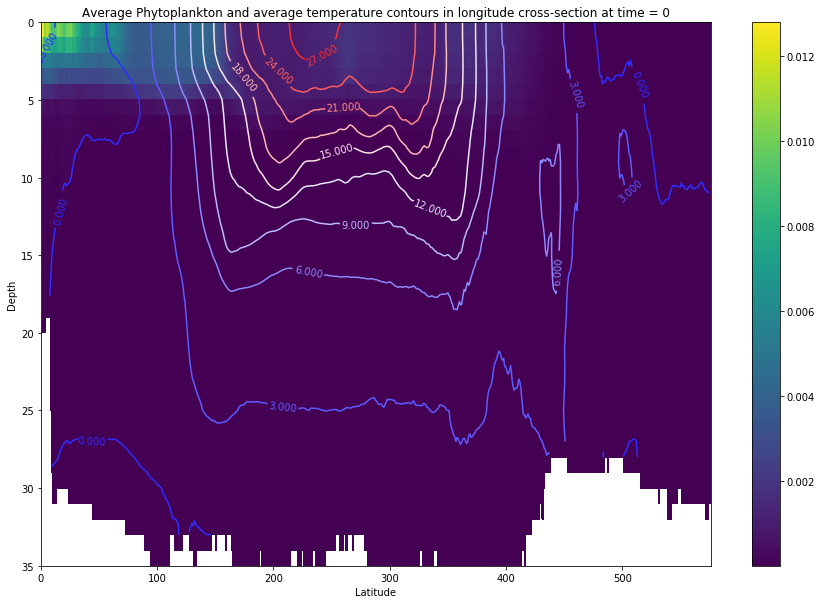

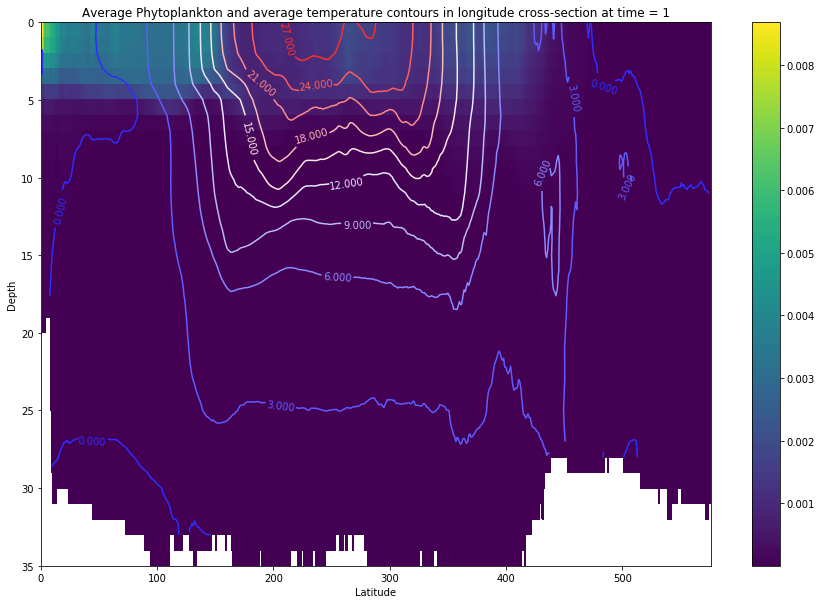

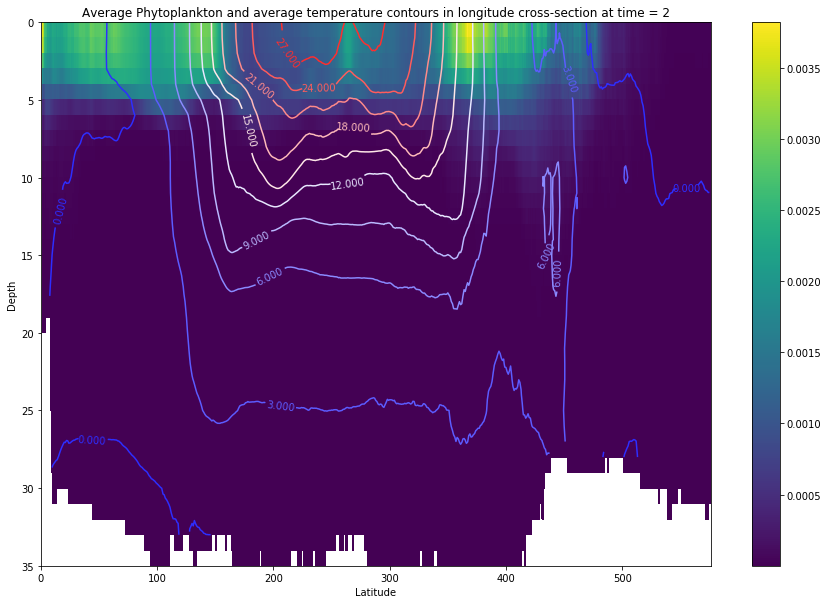

In [5]:
for i in range(0, 3):
    crosslong = np.zeros((35, 576))
    crosstemp = np.zeros((35, 576))
    for j in range(0, 35):
        for k in range(0, 576):
            avgphyto = np.nanmean(phyto.phyc.isel(time = i, z_l = j, yh = k))
            avgtemp = np.nanmean(temp.thetao.isel(time = i, z_l =j, yh = k))
            crosslong[j][k] = avgphyto
            crosstemp[j][k] = avgtemp
    plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
    im = plt.pcolormesh(crosslong)
    # im.set_clim([0, 0.05])
    a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
    plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
    plt.clabel(a, inline = 1, fontsize = 10)
    plt.colorbar(im)
    plt.title('Average Phytoplankton and average temperature contours in longitude cross-section at time = '+ str(i))
    plt.xlabel('Latitude')
    plt.ylabel('Depth')
    plt.show()

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


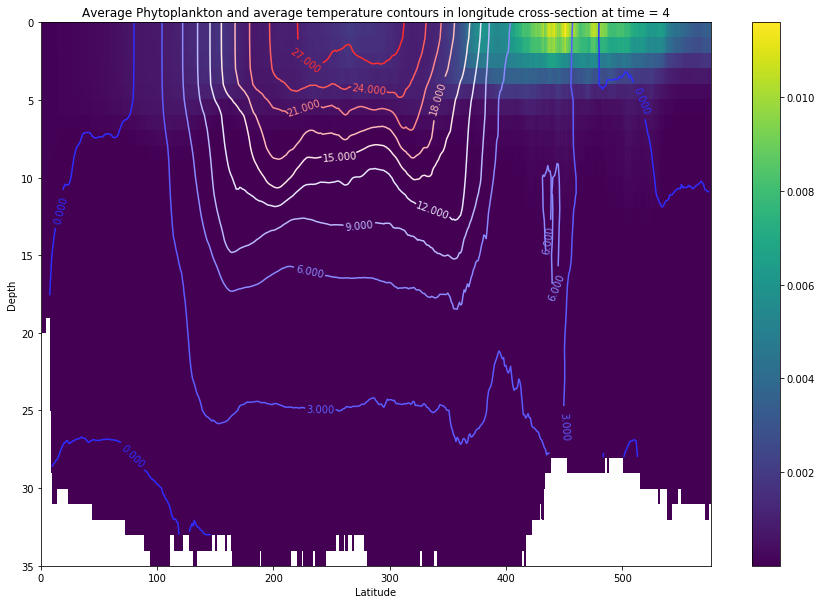

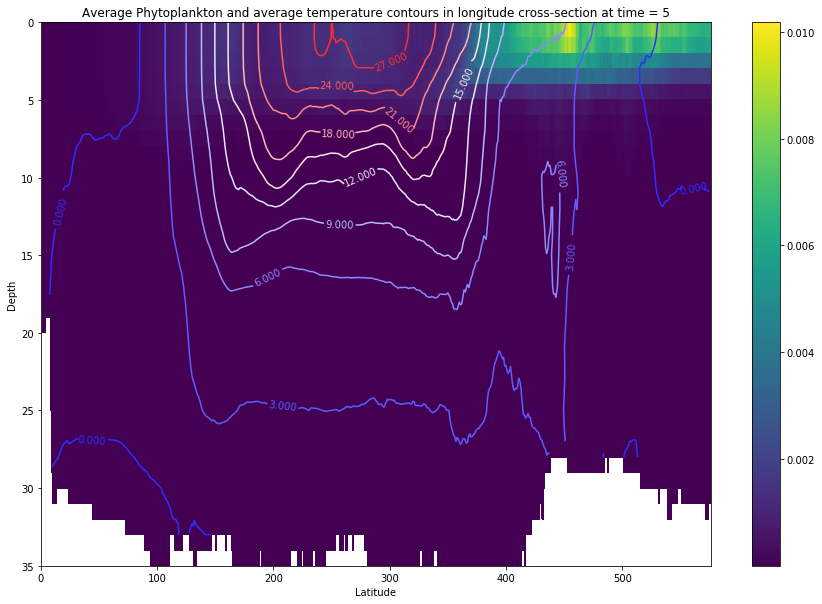

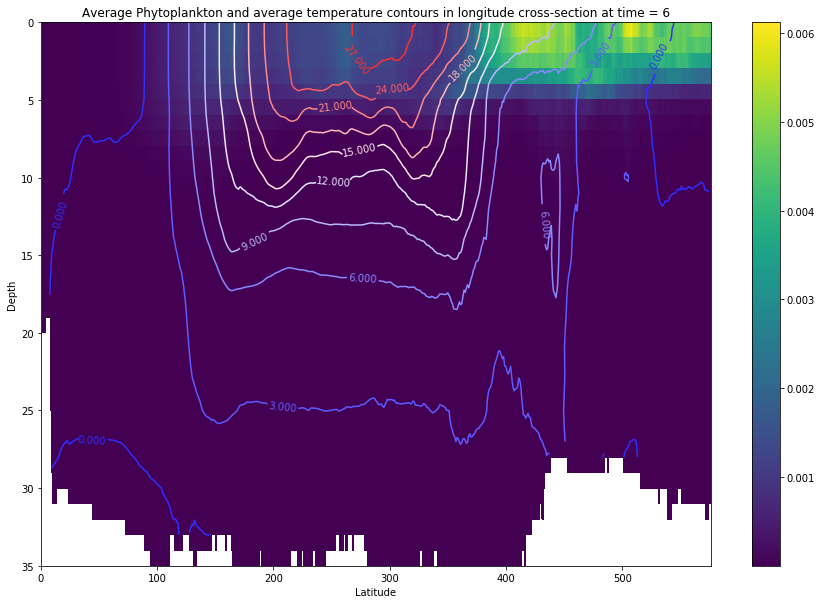

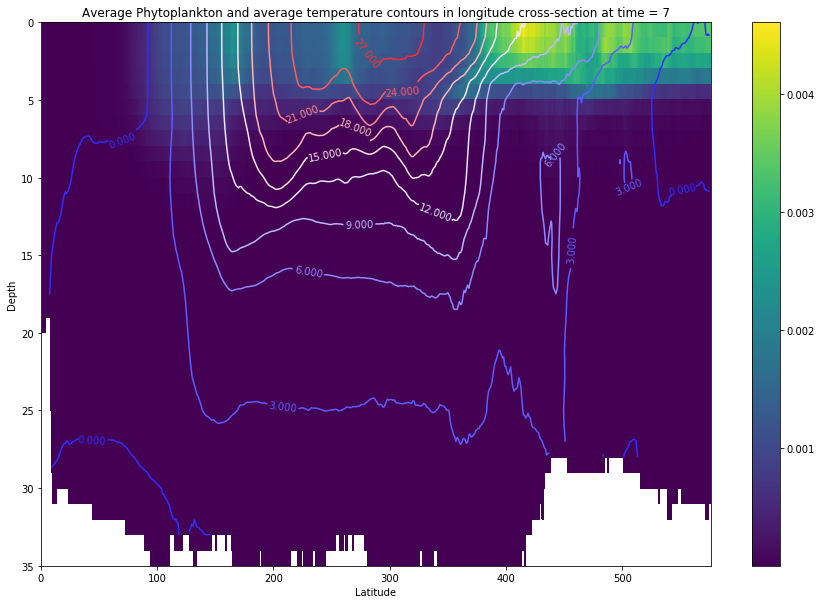

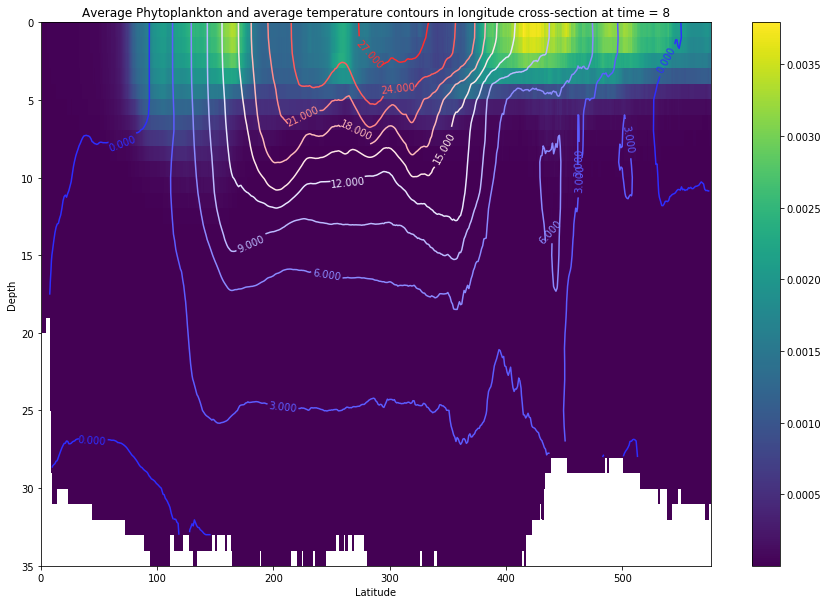

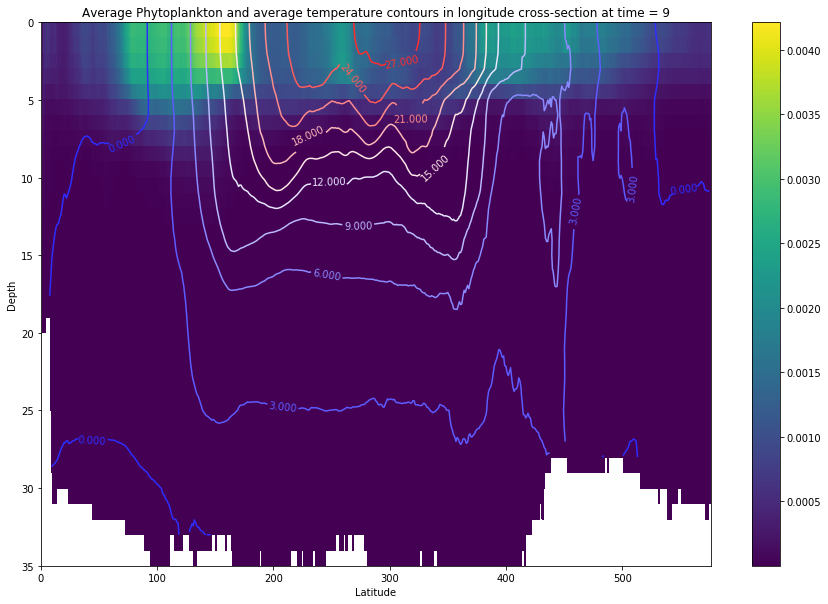

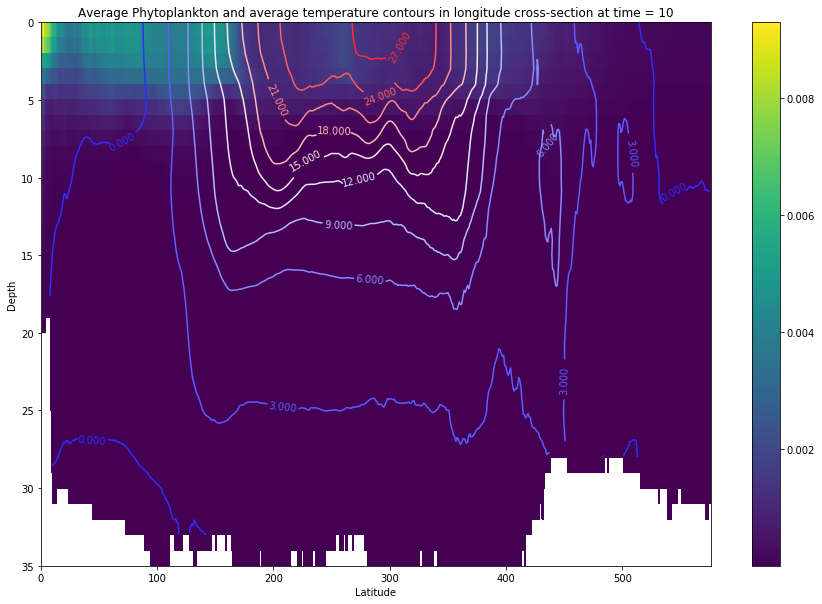

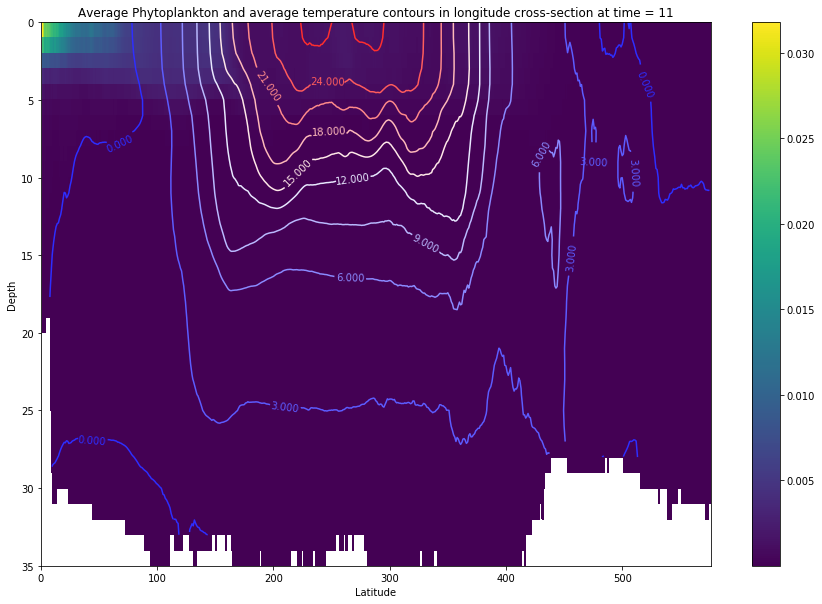

In [6]:
for i in range(4, 12):
    crosslong = np.zeros((35, 576))
    crosstemp = np.zeros((35, 576))
    for j in range(0, 35):
        for k in range(0, 576):
            avgphyto = np.nanmean(phyto.phyc.isel(time = i, z_l = j, yh = k))
            avgtemp = np.nanmean(temp.thetao.isel(time = i, z_l =j, yh = k))
            crosslong[j][k] = avgphyto
            crosstemp[j][k] = avgtemp
    plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
    im = plt.pcolormesh(crosslong)
    # im.set_clim([0, 0.05])
    a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
    plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
    plt.clabel(a, inline = 1, fontsize = 10)
    plt.colorbar(im)
    plt.title('Average Phytoplankton and average temperature contours in longitude cross-section at time = '+ str(i))
    plt.xlabel('Latitude')
    plt.ylabel('Depth')
    plt.show()

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


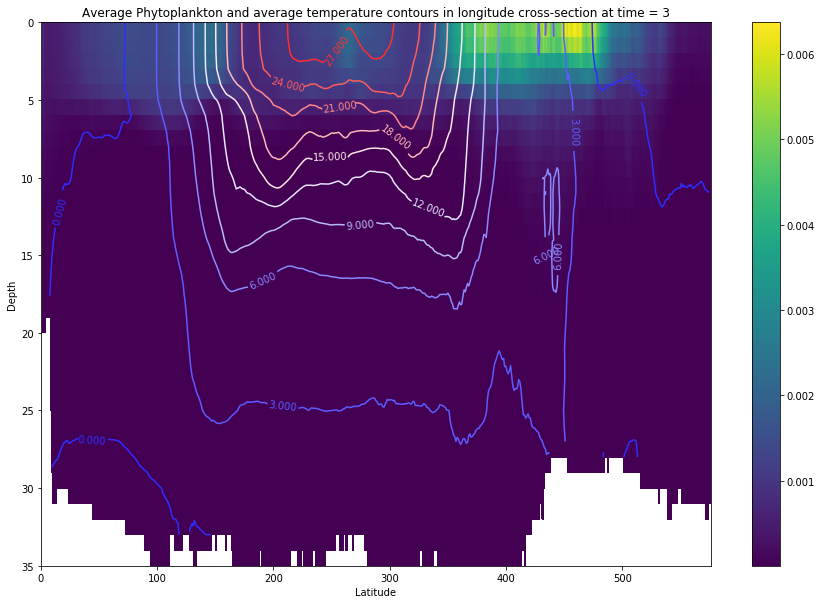

In [7]:
crosslong = np.zeros((35, 576))
crosstemp = np.zeros((35, 576))
for j in range(0, 35):
    for k in range(0, 576):
        avgphyto = np.nanmean(phyto.phyc.isel(time = 3, z_l = j, yh = k))
        avgtemp = np.nanmean(temp.thetao.isel(time = 3, z_l =j, yh = k))
        crosslong[j][k] = avgphyto
        crosstemp[j][k] = avgtemp
plt.figure(figsize = (15,10)) # Changes figure size, easier to visualize data
im = plt.pcolormesh(crosslong)
# im.set_clim([0, 0.05])
a = plt.contour(crosstemp, 10, cmap = plt.cm.bwr)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.title('Average Phytoplankton and average temperature contours in longitude cross-section at time = 3')
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.show()

In [8]:
# There is a faster way
moretemp = temp.thetao
avgtemplat = moretemp.mean(dim = 'xh')
# We are specifying that we are trying group the data by latitude and trying to take the mean with the dimension of longitude. 
morephyto = phyto.phyc
avgphytolat = morephyto.mean(dim = 'xh')

/nbhome/Tyrone.Zhang/miniconda/envs/basic/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'thetao' (time: 60, z_l: 35, yh: 576)>
array([[[      nan,  0.372882, ..., -1.75272 , -1.752147],
        [      nan,  0.487234, ..., -1.739296, -1.735977],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan, -0.528505, ..., -1.760689, -1.761012],
        [      nan, -0.228069, ..., -1.748785, -1.74686 ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[      nan, -1.519133, ..., -1.706836, -1.70891 ],
        [      nan, -1.53051 , ..., -1.675916, -1.675403],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,  0.019541, ..., -1.7378  , -1.737649],
        [      nan, -0.117776, ..., -1.724041, -1.721849],
        ...,
        [      nan,       nan, ...,       nan,

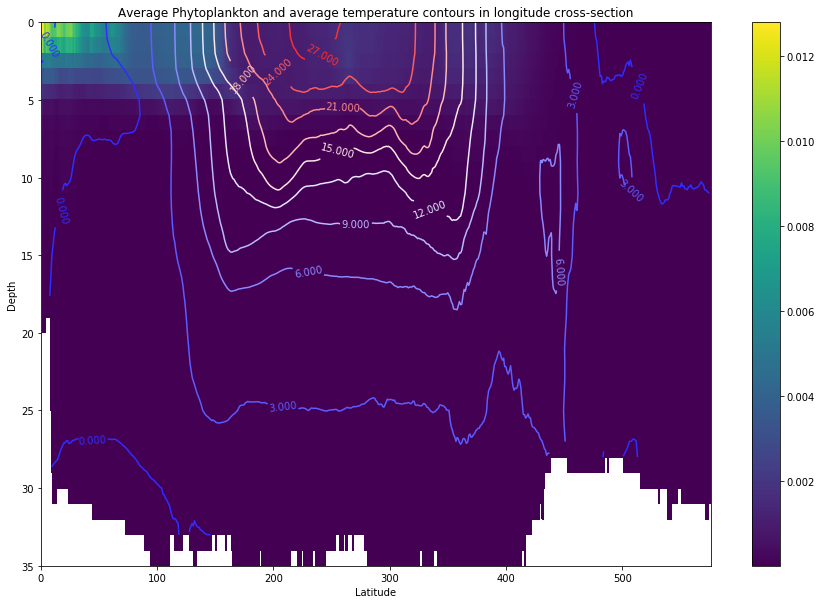

In [9]:
# The references to an index of the array is time, which is from 0 to 59 index, while everything else is considered. 
print(avgtemplat)
print(avgphytolat)
# Actually Plotting
plt.figure(figsize = (15,10))
im = plt.pcolormesh(avgphytolat[0])
a = plt.contour(avgtemplat[0],10, cmap = plt.cm.bwr)
plt.clabel(a, inline = 1, fontsize = 10)
plt.colorbar(im)
plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
plt.title('Average Phytoplankton and average temperature contours in longitude cross-section')
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.show()

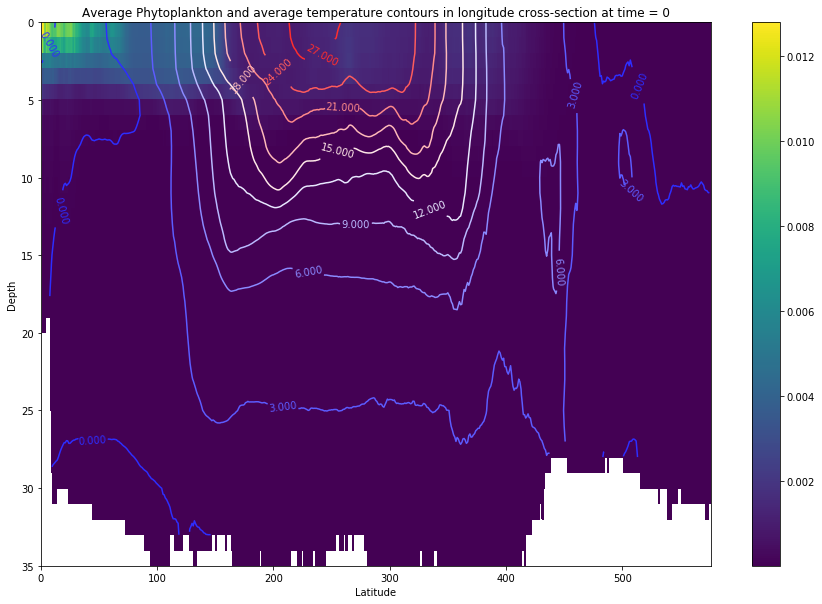

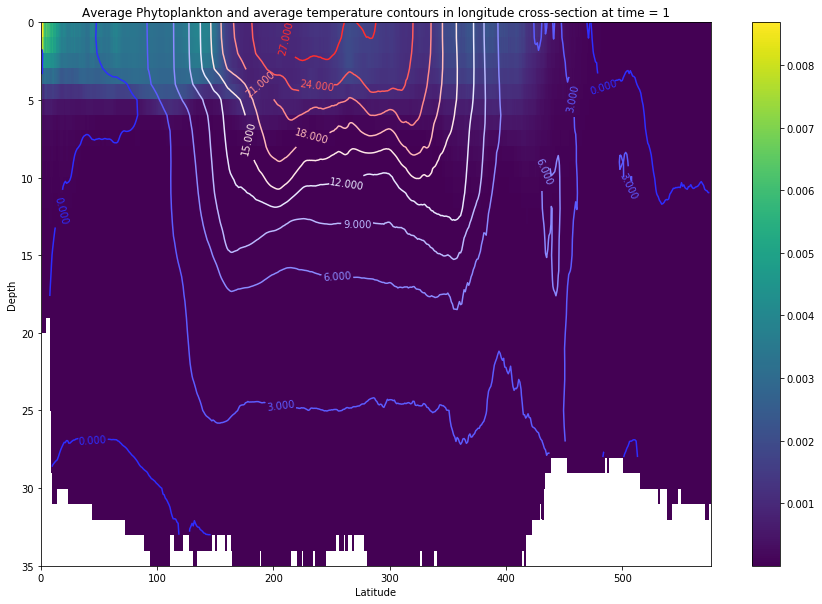

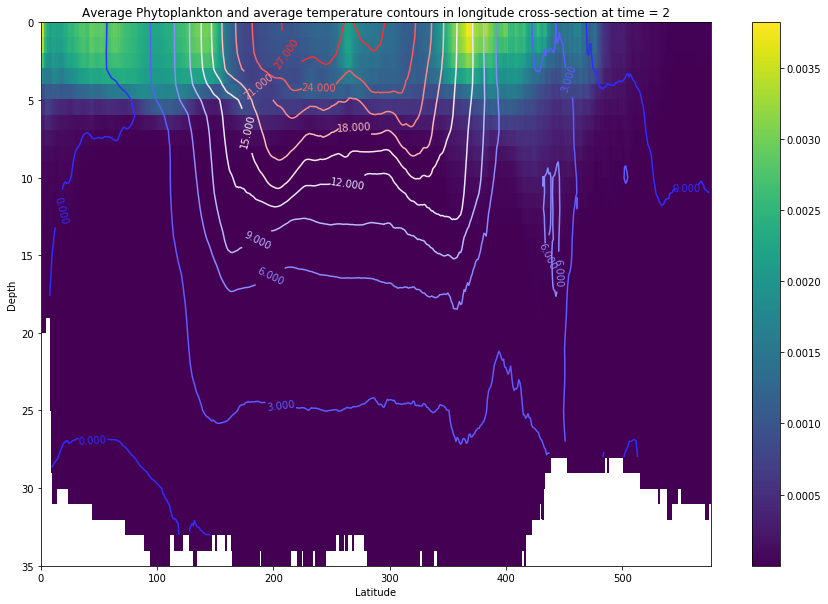

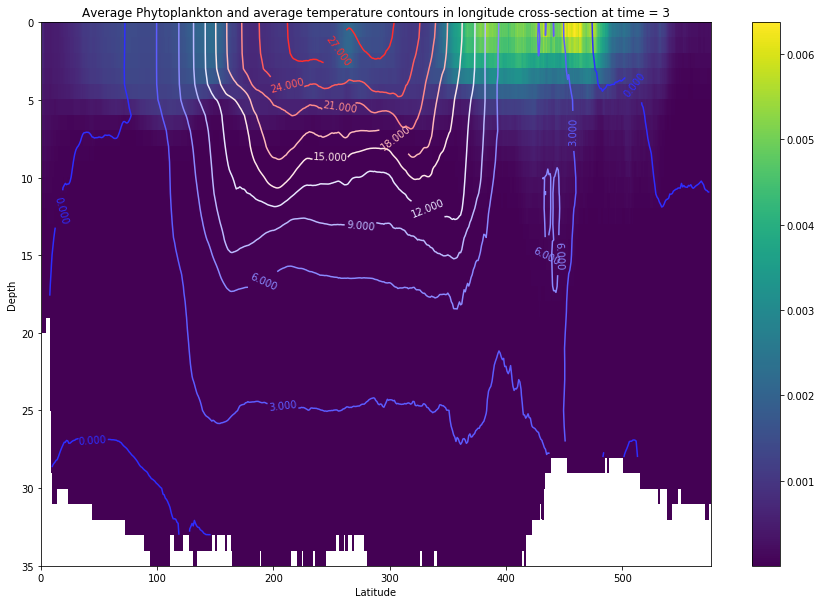

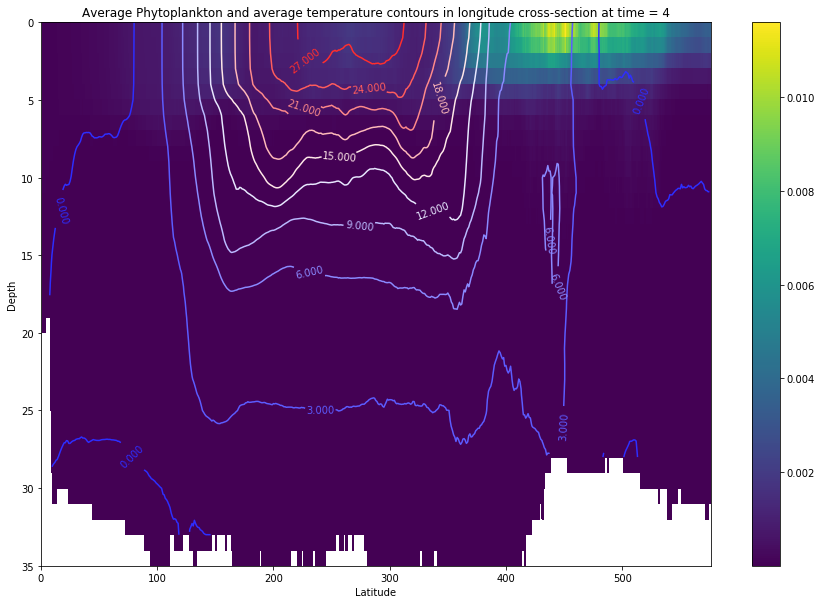

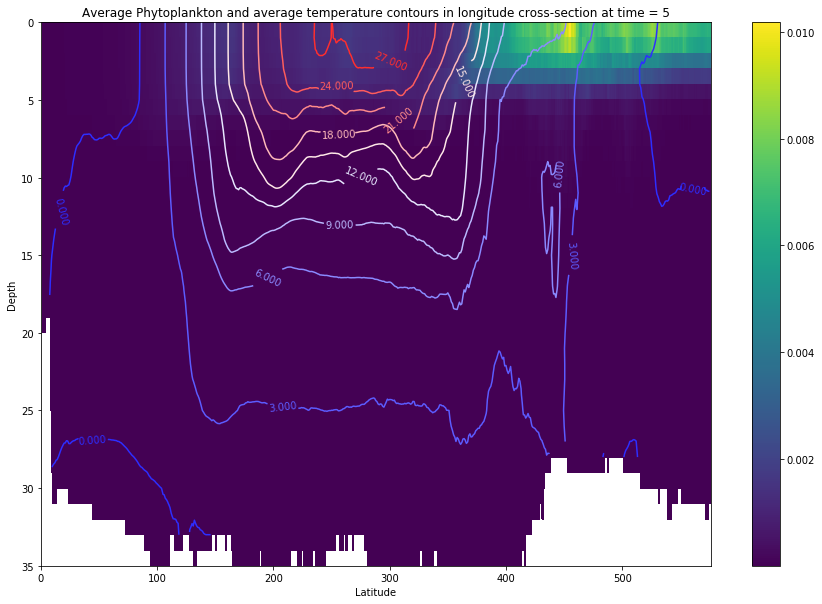

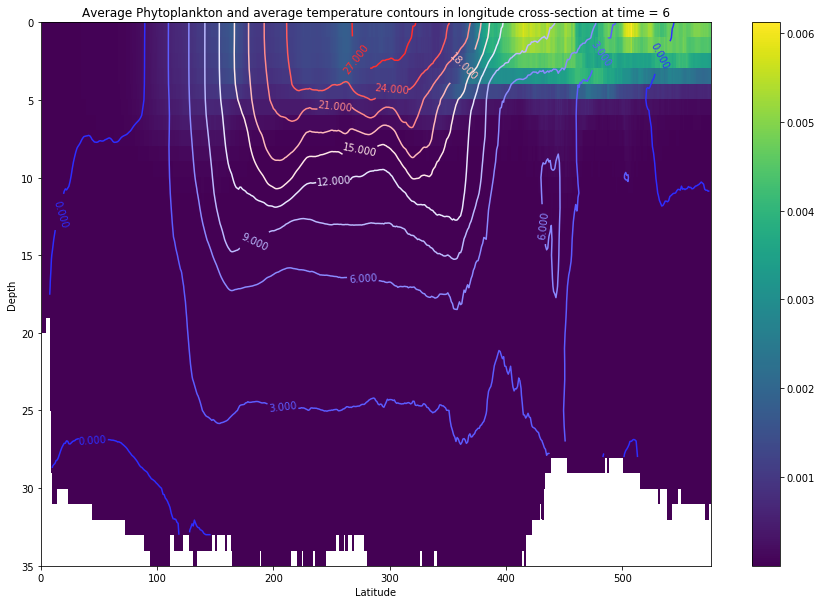

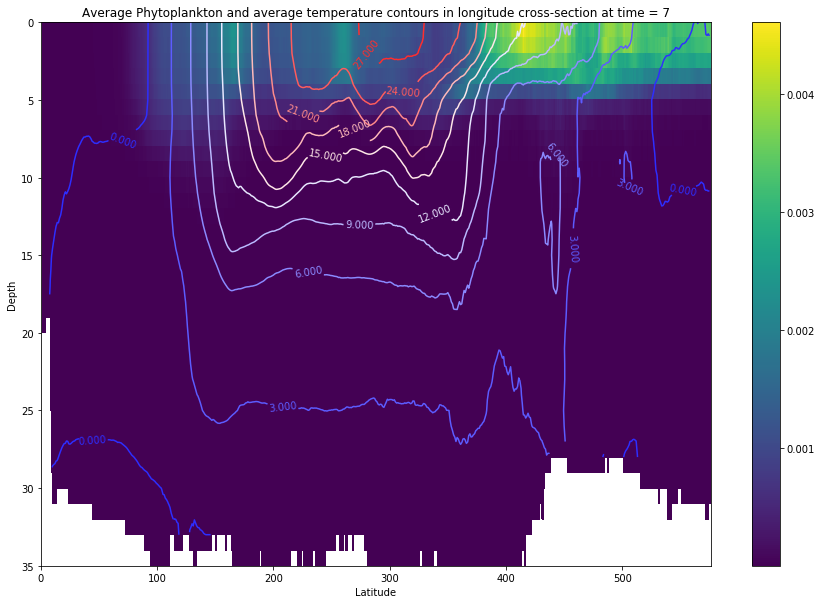

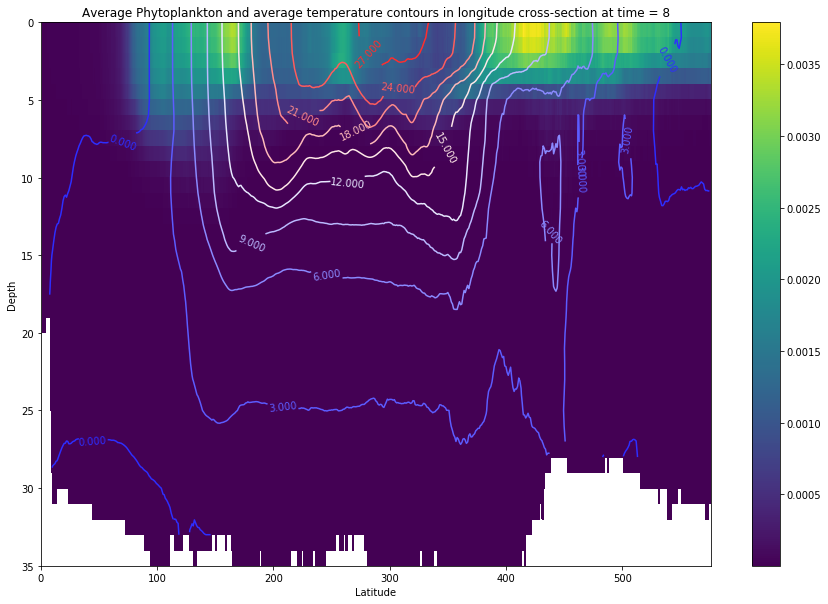

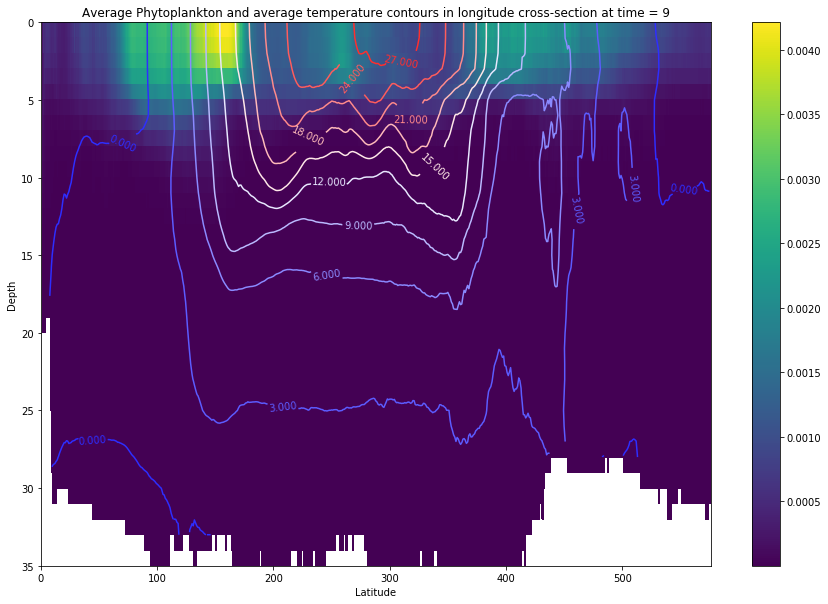

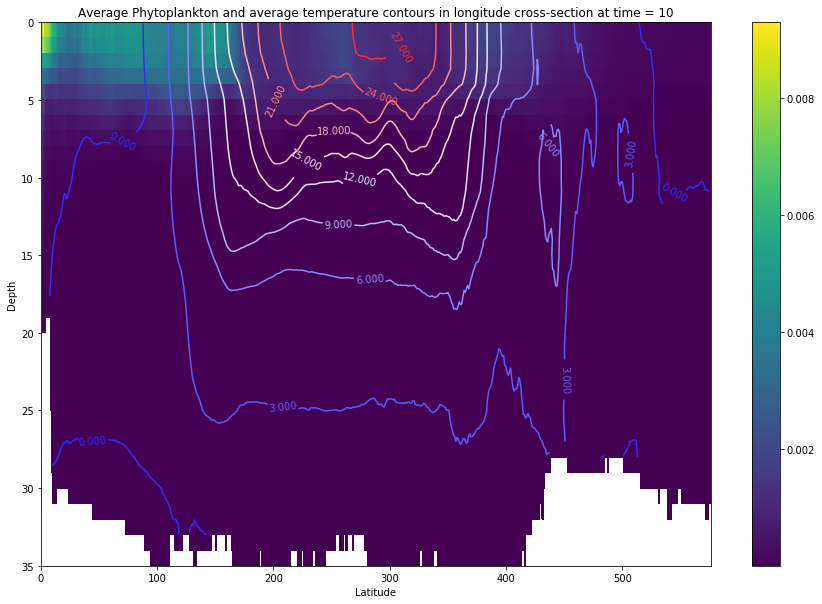

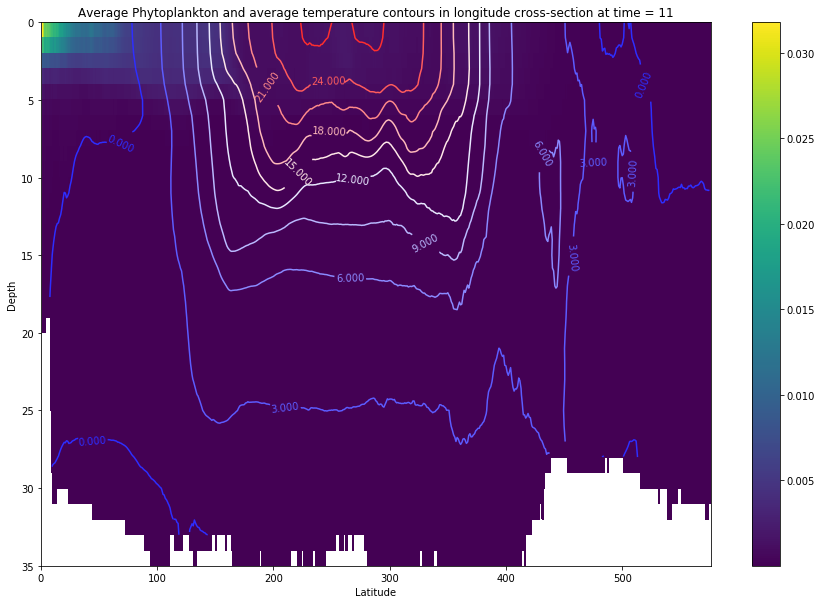

In [10]:
# Displays the same data much faster! 
for i in range(0, 12):
    plt.figure(figsize = (15,10))
    im = plt.pcolormesh(avgphytolat[i])
    a = plt.contour(avgtemplat[i],10, cmap = plt.cm.bwr)
    plt.clabel(a, inline = 1, fontsize = 10)
    plt.colorbar(im)
    plt.gca().invert_yaxis() # invert the y-axis, surface is on top.
    plt.title('Average Phytoplankton and average temperature contours in longitude cross-section at time = ' +str(i))
    plt.xlabel('Latitude')
    plt.ylabel('Depth')
    plt.show()